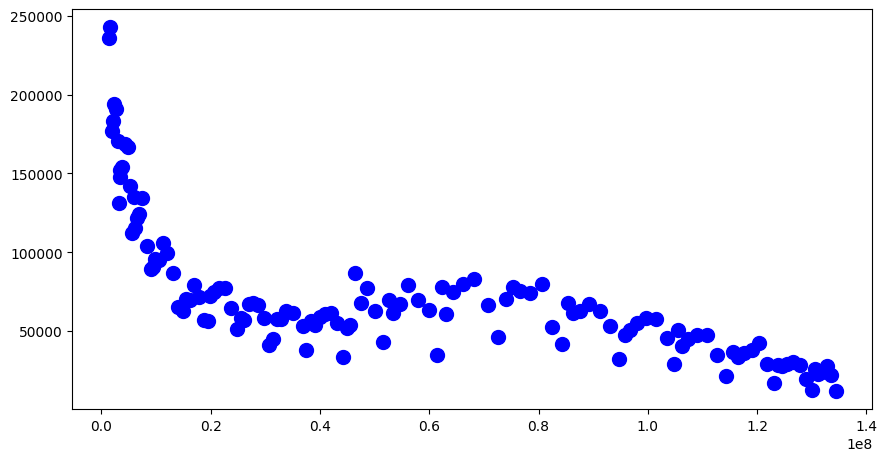

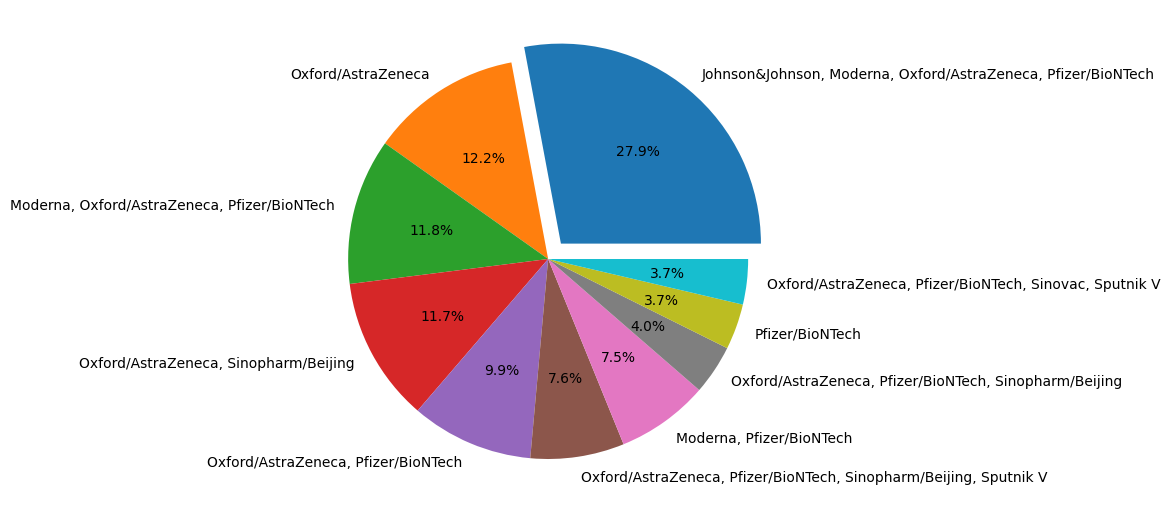

In [2]:
import pandas as pd
covid_df=pd.read_csv('data/covid_df.csv', sep=',')
import matplotlib.pyplot as plt # имрпорт библы
# для более корректного отображения графиков:
%matplotlib inline
plt.style.use('default') # для темной версии vs code

# строим диаграмму рассеяния на основе данных по США
us_data=covid_df[covid_df['country']=='United States']
fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=100,
    marker='o',
    c='blue'
)

# строим круговую диаграмму на основании данных об вакцинах:
vaccine_combinations=covid_df['vaccines'].value_counts()[:10] # данные берем каждые 10-е
fig=plt.figure(figsize=(5,5))
axes=fig.add_axes([0,0,1,1])
axes.pie(
    x=vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode=[0.1,0,0,0,0,0,0,0,0,0] # как узнали кол-во ?????????? 
); 

Добавление информативности в графики

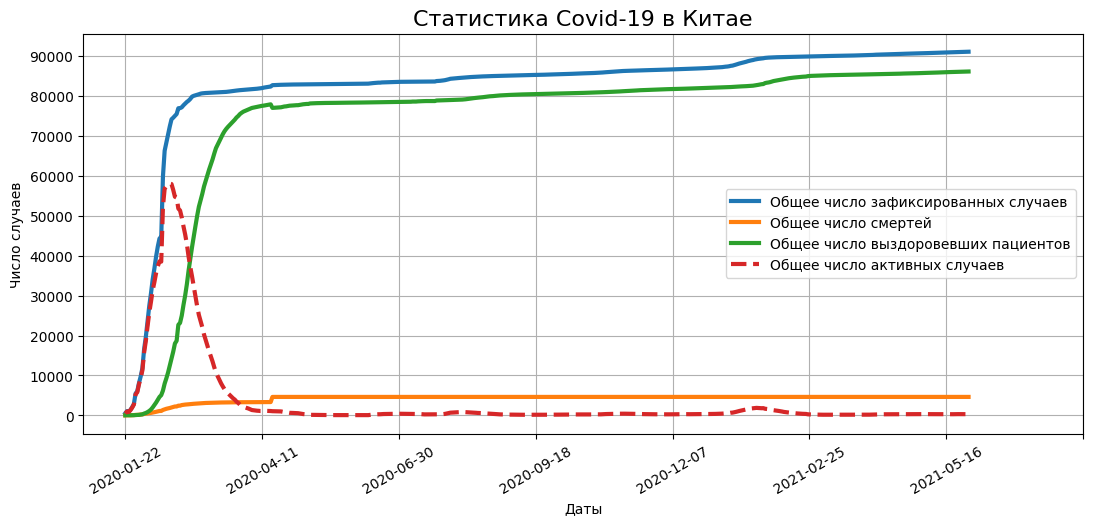

In [3]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.set_xticks(range(0, 600, 80))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend(); 

Использование нескольких систем координат

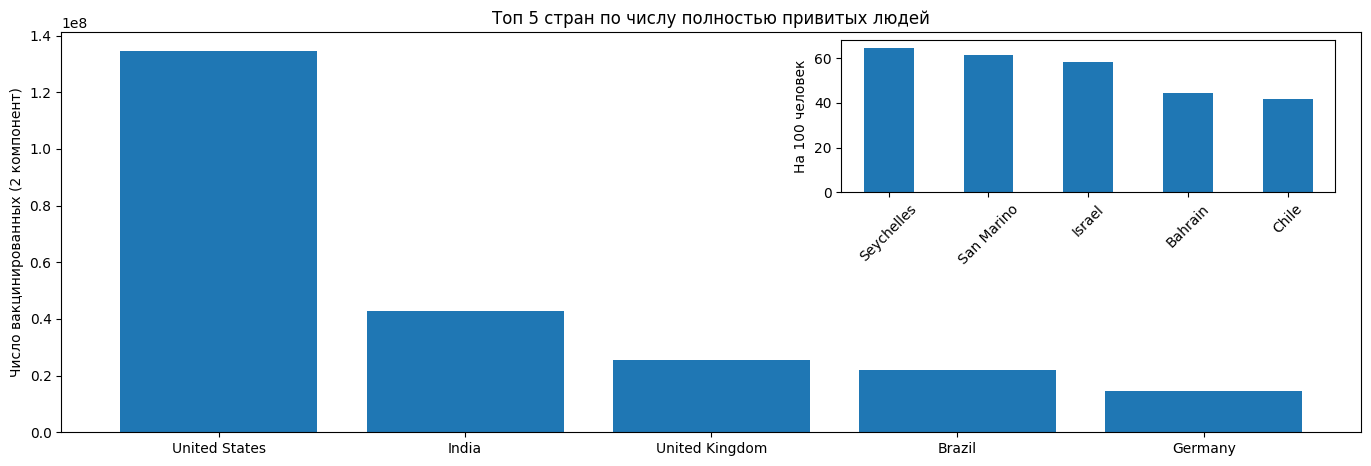

In [4]:
# Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), 
# а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4)) # размер всего конваса
main_axes = fig.add_axes([0, 0, 1, 1]) # шкала координат для мейна
main_axes.bar(x = vacc_country.index, height = vacc_country); # столбчатая x - по странам, по кол-ву вакциниров, ТОП-5
main_axes.set_ylabel('Число вакцинированных (2 компонент)') # подписываем шкалу y
main_axes.set_title('Топ 5 стран по числу полностью привитых людей') # название мейна

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38]) # шкала коорд для суппорта
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5); # по полностью привытым на 100 чел населения
insert_axes.set_ylabel('На 100 человек') # подписываем шкалу суппорта по y
insert_axes.xaxis.set_tick_params(rotation=45) # поворачиваем надписи шкалы по x у саппорта

Создание Subplots

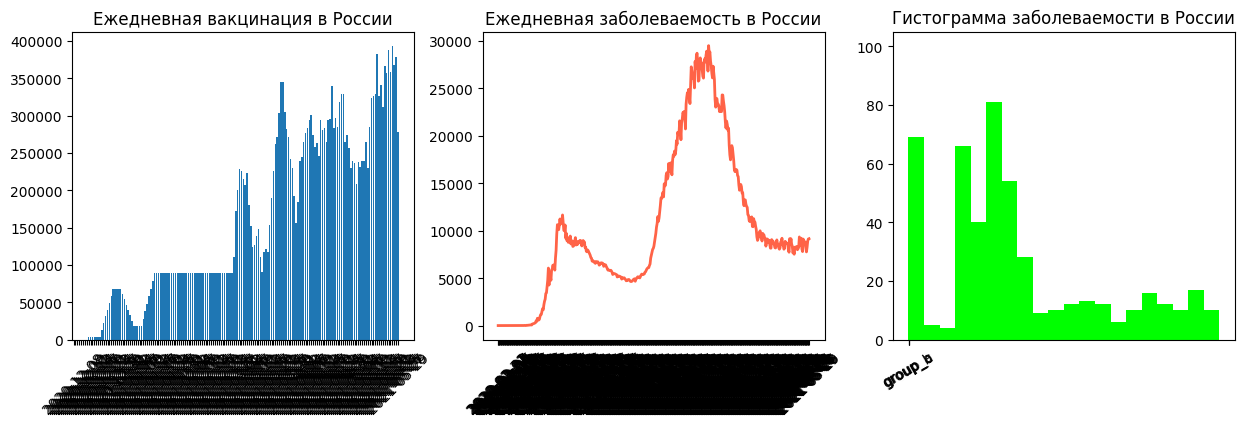

In [7]:
# Постоим три графика на одном канвасе:
# 1/Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
# 2/Линейный график изменения ежедневной заболеваемости в стране.
# 3/Гистограмму ежедневной заболеваемости в стране.
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

#### Модульный подход
# Модульный подход основан на обращении к модулю pyplot (plt) напрямую, а не средствами объектов фигур и плоскостей. 
# Например, следующий код строит столбчатую диаграмму: по оси x откладываются элементы списка names (названия групп), 
# а высоту столбцов определяет список values.

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()